In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None
car_data=pd.read_csv('/content/drive/MyDrive/datasets/Car_Insurance_Claim.csv')
car_data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
print('the max credit score is',car_data['CREDIT_SCORE'].max())
print('the minimum credit score is',car_data['CREDIT_SCORE'].min())

the max credit score is 0.9608188278116948
the minimum credit score is 0.0533575454627435


In [ ]:
car_data.drop(['ID','POSTAL_CODE'],axis=1,inplace=True)

In [ ]:
car_data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


In [ ]:
print('the unique values for age are', car_data['AGE'].unique())
print('the unique values for RACE are', car_data['RACE'].unique())
print('the unique values for DRIVING_EXPERIENCE are', car_data['DRIVING_EXPERIENCE'].unique())

the unique values for age are ['65+' '16-25' '26-39' '40-64']
the unique values for RACE are ['majority' 'minority']
the unique values for DRIVING_EXPERIENCE are ['0-9y' '10-19y' '20-29y' '30y+']


In [ ]:
age_map={'65+':'senior citizen','16-25':'young adult','26-39':'adult','40-64':'middle aged'}
dri_exp={'0-9y':1,'10-19y':2,'20-29y':3,'30y+':4}

In [ ]:
car_data['AGE']=car_data['AGE'].map(age_map)
car_data['DRIVING_EXPERIENCE']=car_data['DRIVING_EXPERIENCE'].map(dri_exp)

In [ ]:
car_data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,senior citizen,female,majority,1,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,young adult,male,majority,1,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,young adult,female,majority,1,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,young adult,male,majority,1,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,adult,male,majority,2,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


In [ ]:
print('the unique values for VEHICLE_YEAR are', car_data['VEHICLE_YEAR'].unique())
print('the unique values for VEHICLE_TYPE are', car_data['VEHICLE_TYPE'].unique())

the unique values for VEHICLE_YEAR are ['after 2015' 'before 2015']
the unique values for VEHICLE_TYPE are ['sedan' 'sports car']


<Axes: xlabel='OUTCOME', ylabel='CREDIT_SCORE'>

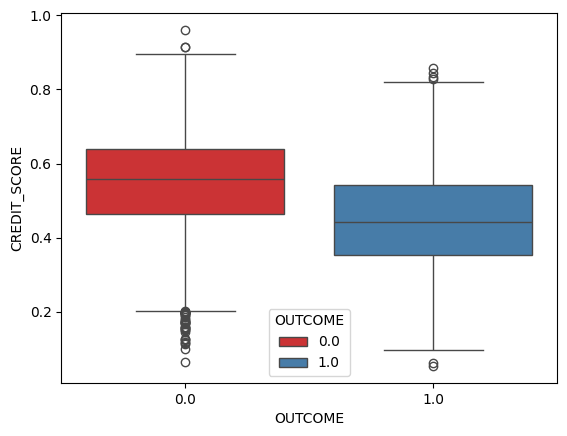

In [ ]:
import seaborn as sns

sns.boxplot(data=car_data,x='OUTCOME',y='CREDIT_SCORE',hue='OUTCOME',palette = "Set1")

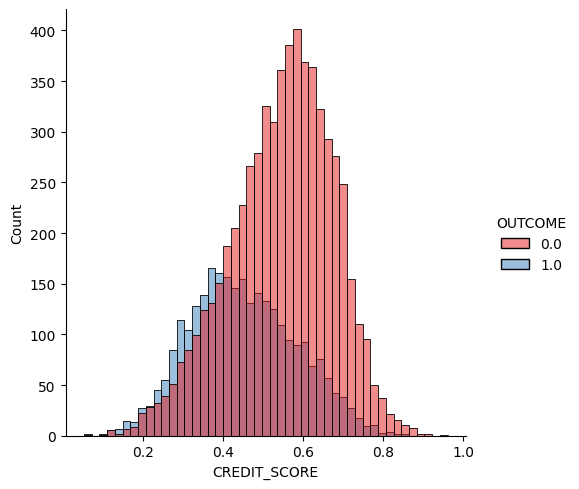

In [ ]:
sns.displot(data=car_data,x='CREDIT_SCORE',hue='OUTCOME',palette = "Set1")

In [ ]:
print(car_data.columns)

car_data.PAST_ACCIDENTS.unique()

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


array([ 0,  1,  3,  7,  2,  5,  4,  6,  8, 10, 11,  9, 12, 14, 15])

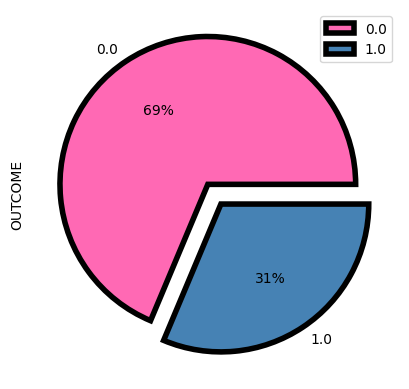

In [ ]:
colors = ['hotpink','steelblue','pink', 'lime','silver','deepskyblue']
explode = (0.08, 0.08)
car_data['OUTCOME'].value_counts().plot(kind='pie',y='churn_prediction', autopct='%1.0f%%',  colors=colors, explode=explode,wedgeprops = {"edgecolor" : "black",'linewidth': 4,'antialiased': True})
plt.legend()

<Axes: xlabel='PAST_ACCIDENTS', ylabel='count'>

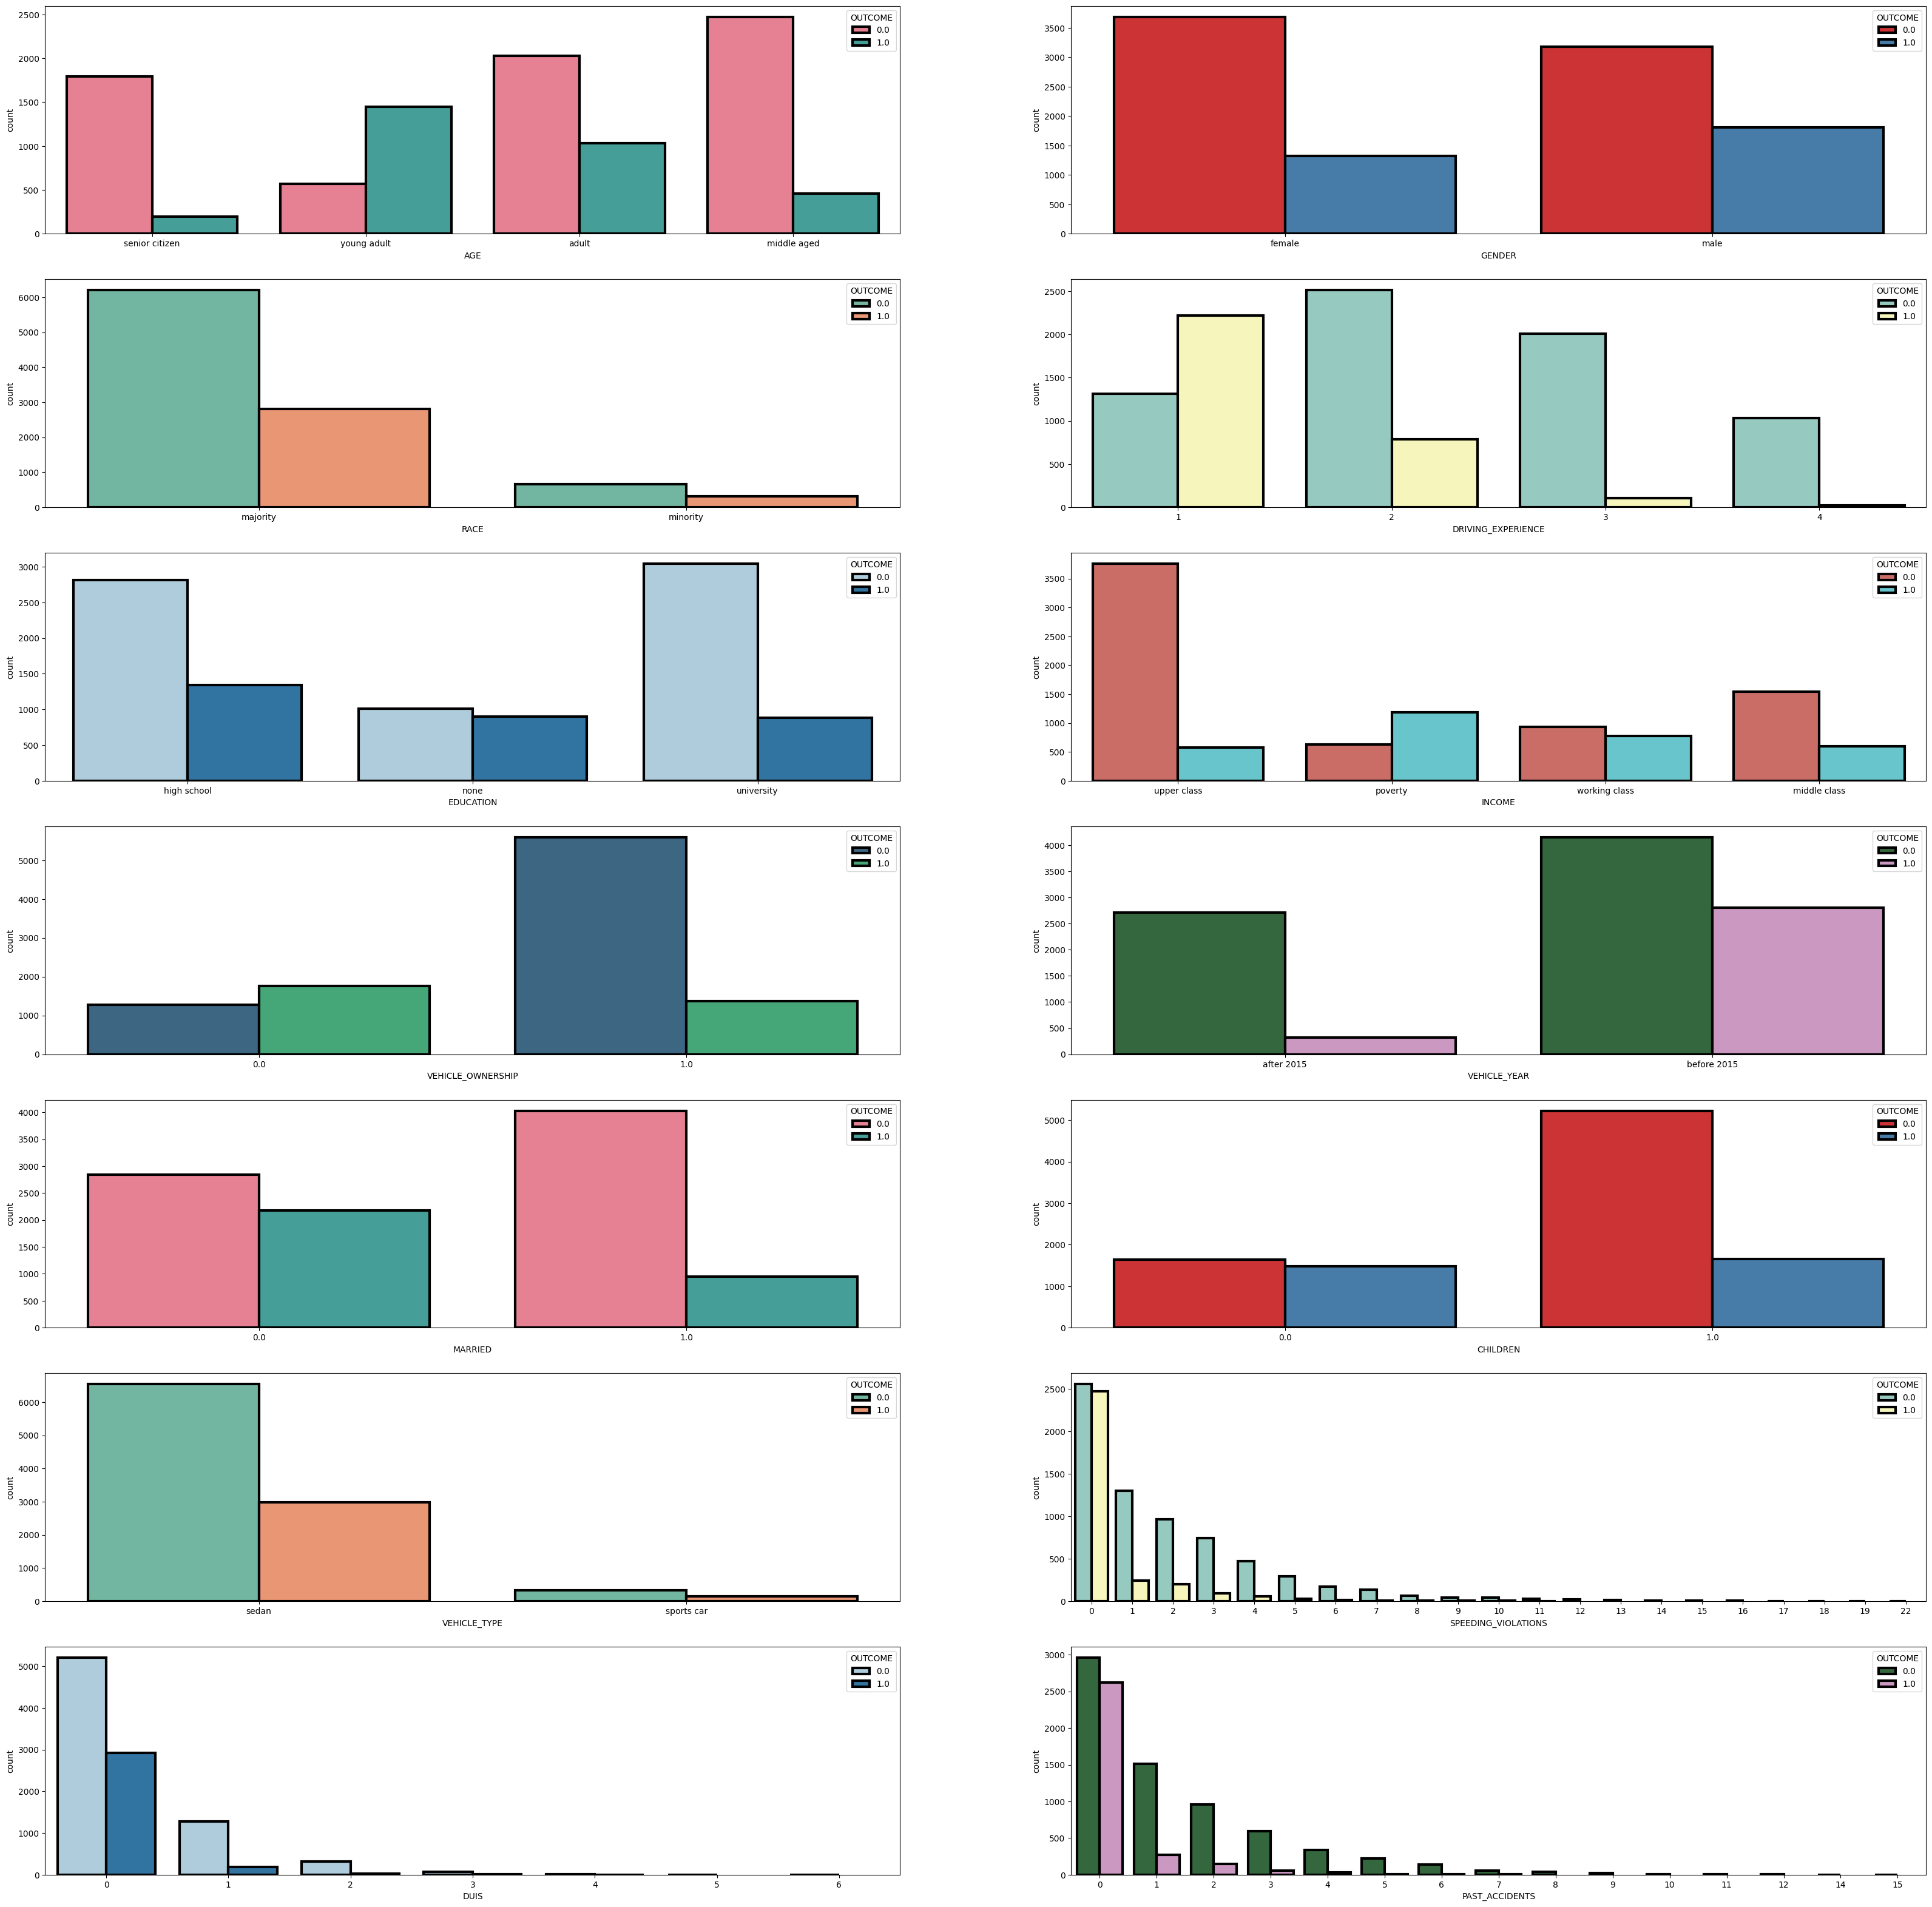

In [ ]:
fig, axarr = plt.subplots(7, 2, figsize=(40,40))

sns.countplot(x='AGE',data=car_data,hue='OUTCOME',palette = "husl",edgecolor='black',linewidth=3,ax=axarr[0][0])
sns.countplot(x='GENDER',data=car_data,hue='OUTCOME',palette = "Set1",edgecolor='black',linewidth=3,ax=axarr[0][1])
sns.countplot(x='RACE',data=car_data,hue='OUTCOME',palette = "Set2",edgecolor='black',linewidth=3,ax=axarr[1][0])
sns.countplot(x='DRIVING_EXPERIENCE',data=car_data,hue='OUTCOME',palette = "Set3",edgecolor='black',linewidth=3,ax=axarr[1][1])
sns.countplot(x='EDUCATION',data=car_data,hue='OUTCOME',palette = "Paired",edgecolor='black',linewidth=3,ax=axarr[2][0])
sns.countplot(x='INCOME',data=car_data,hue='OUTCOME',palette = "hls",edgecolor='black',linewidth=3,ax=axarr[2][1])
sns.countplot(x='VEHICLE_OWNERSHIP',data=car_data,hue='OUTCOME',palette = "viridis",edgecolor='black',linewidth=3,ax=axarr[3][0])
sns.countplot(x='VEHICLE_YEAR',data=car_data,hue='OUTCOME',palette = "cubehelix",edgecolor='black',linewidth=3,ax=axarr[3][1])
sns.countplot(x='MARRIED',data=car_data,hue='OUTCOME',palette = "husl",edgecolor='black',linewidth=3,ax=axarr[4][0])
sns.countplot(x='CHILDREN',data=car_data,hue='OUTCOME',palette = "Set1",edgecolor='black',linewidth=3,ax=axarr[4][1])
sns.countplot(x='VEHICLE_TYPE',data=car_data,hue='OUTCOME',palette = "Set2",edgecolor='black',linewidth=3,ax=axarr[5][0])
sns.countplot(x='SPEEDING_VIOLATIONS',data=car_data,hue='OUTCOME',palette = "Set3",edgecolor='black',linewidth=3,ax=axarr[5][1])
sns.countplot(x='DUIS',data=car_data,hue='OUTCOME',palette = "Paired",edgecolor='black',linewidth=3,ax=axarr[6][0])
sns.countplot(x='PAST_ACCIDENTS',data=car_data,hue='OUTCOME',palette = "cubehelix",edgecolor='black',linewidth=3,ax=axarr[6][1])

<Axes: xlabel='ANNUAL_MILEAGE'>

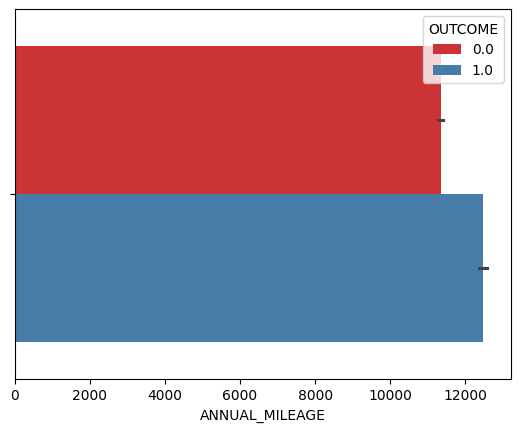

In [ ]:
sns.barplot(data=car_data,x='ANNUAL_MILEAGE',hue='OUTCOME',palette = "Set1")

In [ ]:
group1_1=car_data[car_data['OUTCOME']==1.0]
group2_0=car_data[car_data['OUTCOME']==0.0]

In [ ]:
group1_1.dropna(inplace=True)
group2_0.dropna(inplace=True)

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(group1_1['ANNUAL_MILEAGE'], group2_0['ANNUAL_MILEAGE'])


TtestResult(statistic=16.97866566938305, pvalue=1.4520525361234216e-63, df=8147.0)

In [ ]:
ttest_ind(group1_1['CREDIT_SCORE'], group2_0['CREDIT_SCORE'])

TtestResult(statistic=-30.63899467076287, pvalue=3.2048796632207296e-195, df=8147.0)

In [ ]:
print('the unique values for age are', car_data['AGE'].unique())
print('the unique values for RACE are', car_data['RACE'].unique())
print('the unique values for DRIVING_EXPERIENCE are', car_data['DRIVING_EXPERIENCE'].unique())
print('the unique values for EDUCATION are', car_data['EDUCATION'].unique())
print('the unique values for INCOME are', car_data['INCOME'].unique())
print('the unique values for VEHICLE_YEAR are', car_data['VEHICLE_YEAR'].unique())
print('the unique values for MARRIED are', car_data['MARRIED'].unique())
print('the unique values for CHILDREN are', car_data['CHILDREN'].unique())
print('the unique values for ANNUAL_MILEAGE are', car_data['ANNUAL_MILEAGE'].unique())
print('the unique values for VEHICLE_TYPE are', car_data['VEHICLE_TYPE'].unique())
print('the unique values for SPEEDING_VIOLATIONS are', car_data['SPEEDING_VIOLATIONS'].unique())
print('the unique values for DUIS are', car_data['DUIS'].unique())
print('the unique values for PAST_ACCIDENTS are', car_data['PAST_ACCIDENTS'].unique())
print('the unique values for OUTCOME are', car_data['OUTCOME'].unique())

the unique values for age are ['senior citizen' 'young adult' 'adult' 'middle aged']
the unique values for RACE are ['majority' 'minority']
the unique values for DRIVING_EXPERIENCE are [1 2 3 4]
the unique values for EDUCATION are ['high school' 'none' 'university']
the unique values for INCOME are ['upper class' 'poverty' 'working class' 'middle class']
the unique values for VEHICLE_YEAR are ['after 2015' 'before 2015']
the unique values for MARRIED are [0. 1.]
the unique values for CHILDREN are [1. 0.]
the unique values for ANNUAL_MILEAGE are [12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]
the unique values for VEHICLE_TYPE are ['sedan' 'sports car']
the unique values for SPEEDING_VIOLATIONS are [ 0  2  3  7  6  4 10 13  1  5  9  8 12 11 15 17 19 18 16 14 22]
the unique values for DUIS are [0 2 1 3 4 5 6]
the unique values for PAST_ACCIDENTS are [ 0  1  3  7  2  5  4  6  8 10

In [ ]:
age_dicto={'young adult':0,'adult':1,'middle aged':2,'senior citizen':3}
race_dicto={'majority':0,'minority':1}
edu_dicto={'none':0,'high school':1,'university':2}
inc_dicto={'poverty':0,'working class':1,'middle class':2,'upper class':3}
vyear_dicto={'before 2015':0,'after 2015':1}
gen_dicto={'female':0,'male':1}
cartype_dicto={'sedan':0,'sports car':1}

car_data['AGE']=car_data['AGE'].map(age_dicto)
car_data['RACE']=car_data['RACE'].map(race_dicto)
car_data['EDUCATION']=car_data['EDUCATION'].map(edu_dicto)
car_data['INCOME']=car_data['INCOME'].map(inc_dicto)
car_data['VEHICLE_YEAR']=car_data['VEHICLE_YEAR'].map(vyear_dicto)
car_data['GENDER']=car_data['GENDER'].map(gen_dicto)
car_data['VEHICLE_TYPE']=car_data['VEHICLE_TYPE'].map(cartype_dicto)

In [ ]:
car_data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,1,1,3,0.629027,1.0,1,0.0,1.0,12000.0,0,0,0,0,0.0
1,0,1,0,1,0,0,0.357757,0.0,0,0.0,0.0,16000.0,0,0,0,0,1.0
2,0,0,0,1,1,1,0.493146,1.0,0,0.0,0.0,11000.0,0,0,0,0,0.0
3,0,1,0,1,2,1,0.206013,1.0,0,0.0,1.0,11000.0,0,0,0,0,0.0
4,1,1,0,2,0,1,0.388366,1.0,0,0.0,0.0,12000.0,0,2,0,1,1.0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  int64  
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [ ]:
x=car_data.copy()
x.drop(['OUTCOME'],axis=1,inplace=True)
x.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,3,0,0,1,1,3,0.629027,1.0,1,0.0,1.0,12000.0,0,0,0,0
1,0,1,0,1,0,0,0.357757,0.0,0,0.0,0.0,16000.0,0,0,0,0
2,0,0,0,1,1,1,0.493146,1.0,0,0.0,0.0,11000.0,0,0,0,0
3,0,1,0,1,2,1,0.206013,1.0,0,0.0,1.0,11000.0,0,0,0,0
4,1,1,0,2,0,1,0.388366,1.0,0,0.0,0.0,12000.0,0,2,0,1


In [ ]:
y=car_data['OUTCOME']
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: OUTCOME, dtype: float64

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =42)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:21<00:00,  1.33it/s]

[LightGBM] [Info] Number of positive: 2196, number of negative: 4804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313714 -> initscore=-0.782811
[LightGBM] [Info] Start training from score -0.782811


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.84,0.81,0.81,0.84,0.62
LogisticRegression,0.84,0.81,0.81,0.84,0.07
SGDClassifier,0.83,0.81,0.81,0.83,0.14
SVC,0.84,0.81,0.81,0.84,2.55
AdaBoostClassifier,0.84,0.81,0.81,0.84,0.39
CalibratedClassifierCV,0.84,0.81,0.81,0.84,2.21
QuadraticDiscriminantAnalysis,0.79,0.81,0.81,0.80,0.05
LGBMClassifier,0.84,0.81,0.81,0.84,0.24
LinearDiscriminantAnalysis,0.84,0.80,0.80,0.83,0.09


In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Param = {"subsample":[0.5, 0.75, 1],
              "learning_rate":[0.3, 0.1, 0.03],
               "n_estimators":[100,128,150]}

model_resample = XGBClassifier(n_jobs=-1)

model_gs_resaple = GridSearchCV(model_resample,param_grid=Param,cv=3,scoring="accuracy")

model_gs_resaple.fit(X_train, y_train)
boost_pred_resample=model_gs_resaple.predict(X_test)
print(model_gs_resaple.best_estimator_)
print(model_gs_resaple.score(X_test, y_test))
print(classification_report(y_test,boost_pred_resample))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
0.839
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2063
         1.0       0.76      0.71      0.73       937

    accuracy                           0.84      3000
   macro avg       0.